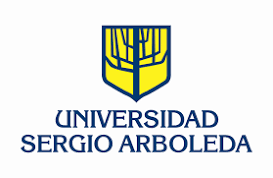

Udacity-cs344 HW1

Computación Paralela y distribuida

* Santiago Niño
* Esteban Rodriguez
* Daniel Velasquez

Abril 2023

In [ ]:
# Homework 1 for Udacity CS344 Course, Intro to Parallel Programming
# clone the code repo,
!git clone https://github.com/depctg/udacity-cs344-colab
!pip install git+https://github.com/depctg/nvcc4jupyter.git

# load cuda plugin
%config NVCCPluginV2.static_dir = True
%config NVCCPluginV2.relative_dir = "udacity-cs344-colab/src/HW1"
%load_ext nvcc_plugin

# change to work directory, generate makefiles
!mkdir udacity-cs344-colab/build
%cd udacity-cs344-colab/build
!cmake ../src

Cloning into 'udacity-cs344-colab'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 144 (delta 14), reused 12 (delta 12), pack-reused 120
Receiving objects: 100% (144/144), 3.93 MiB | 18.23 MiB/s, done.
Resolving deltas: 100% (43/43), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/depctg/nvcc4jupyter.git to /tmp/pip-req-build-_5kt_1ry
  Running command git clone --filter=blob:none --quiet https://github.com/depctg/nvcc4jupyter.git /tmp/pip-req-build-_5kt_1ry
  Resolved https://github.com/depctg/nvcc4jupyter.git to commit 63b811d987446c2a3783845b7b85cda6e562b71a
  Preparing metadata (setup.py) ... done
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4333 sha256=a7d50a59bc6eea5281a35cf2bb2226c029b6c2489abe61b03e28295a1be1730d
  Stored in directory: /tmp/pip-ephem-wheel-

In [ ]:
makefiletemp = open('../src/CMakeLists.txt','r+')
list_of_lines = makefiletemp.readlines()
list_of_lines[23] = "-Wno-deprecated-gpu-targets \n"

makefiletemp = open('../src/CMakeLists.txt','w')
makefiletemp.writelines(list_of_lines)
makefiletemp.close()

In [ ]:
makefiletemp = open('../build/HW1/CMakeFiles/HW1.dir/HW1_generated_student_func.cu.o.cmake','r+')
list_of_lines = makefiletemp.readlines()
list_of_lines[75] = "-Wno-deprecated-gpu-targets \n"

makefiletemp = open('../build/HW1/CMakeFiles/HW1.dir/HW1_generated_student_func.cu.o.cmake','w')
makefiletemp.writelines(list_of_lines)
makefiletemp.close()

In [ ]:
makefiletemp = open('../build/HW1/CMakeFiles/HW1.dir/HW1_generated_student_func.cu.o.cmake.pre-gen','r+')
list_of_lines = makefiletemp.readlines()
list_of_lines[75] = "-Wno-deprecated-gpu-targets \n"

makefiletemp = open('../build/HW1/CMakeFiles/HW1.dir/HW1_generated_student_func.cu.o.cmake.pre-gen','w')
makefiletemp.writelines(list_of_lines)
makefiletemp.close()

In [ ]:
makefiletemp = open('../src/HW1/HW1.cpp','r+')
list_of_lines = makefiletemp.readlines()
list_of_lines[29] = "image = cv::imread(filename.c_str(), cv::IMREAD_COLOR); \n"
list_of_lines[35] = "cv::cvtColor(image, imageRGBA, cv::COLOR_BGR2RGBA); \n"
list_of_lines[79] = "cv::Mat reference = cv::imread(input_filename, cv::IMREAD_GRAYSCALE); \n"

makefiletemp = open('../src/HW1/HW1.cpp','w')
makefiletemp.writelines(list_of_lines)
makefiletemp.close()

In [ ]:
%%writefile ../src/HW1/student_func.cu

// Homework 1
// Color to Greyscale Conversion

//A common way to represent color images is known as RGBA - the color
//is specified by how much Red, Grean and Blue is in it.
//The 'A' stands for Alpha and is used for transparency, it will be
//ignored in this homework.

//Each channel Red, Blue, Green and Alpha is represented by one byte.
//Since we are using one byte for each color there are 256 different
//possible values for each color.  This means we use 4 bytes per pixel.

//Greyscale images are represented by a single intensity value per pixel
//which is one byte in size.

//To convert an image from color to grayscale one simple method is to
//set the intensity to the average of the RGB channels.  But we will
//use a more sophisticated method that takes into account how the eye
//perceives color and weights the channels unequally.

//The eye responds most strongly to green followed by red and then blue.
//The NTSC (National Television System Committee) recommends the following
//formula for color to greyscale conversion:

//I = .299f * R + .587f * G + .114f * B

//Notice the trailing f's on the numbers which indicate that they are
//single precision floating point constants and not double precision
//constants.

//You should fill in the kernel as well as set the block and grid sizes
//so that the entire image is processed.

#include "utils.h"
using namespace std;


__global__
void rgba_to_greyscale(const uchar4* const rgbaImage,
                       unsigned char* const greyImage,
                       int numRows, int numCols)
{
  //TODO
  //Fill in the kernel to convert from color to greyscale
  //the mapping from components of a uchar4 to RGBA is:
  // .x -> R ; .y -> G ; .z -> B ; .w -> A
  //
  //The output (greyImage) at each pixel should be the result of
  //applying the formula: output = .299f * R + .587f * G + .114f * B;
  //Note: We will be ignoring the alpha channel for this conversion

  //First create a mapping from the 2D block and grid locations
  //to an absolute 2D location in the image, then use that to
  //calculate a 1D offset

  int pixel = 15;
  unsigned int x = blockIdx.x*blockDim.x + threadIdx.x;
  unsigned int y = blockIdx.y*blockDim.y + threadIdx.y;
  pixel = y * numCols + x;


  float r = rgbaImage[pixel].x;
  float g = rgbaImage[pixel].y;
  float b = rgbaImage[pixel].z;

  float out = 0.299f * r + 0.587f * g + 0.114f * b;
  greyImage[pixel] = out;

}

void your_rgba_to_greyscale(const uchar4 * const h_rgbaImage, uchar4 * const d_rgbaImage,
                            unsigned char* const d_greyImage, size_t numRows, size_t numCols)
{
  //You must fill in the correct sizes for the blockSize and gridSize
  //currently only one block with one thread is being launched

  const unsigned int threadGrid = 16;
  const dim3 blockSize((numCols + threadGrid - 1)/threadGrid, (numRows + threadGrid - 1) /threadGrid, 1);  //TODO
  const dim3 gridSize( threadGrid, threadGrid, 1);  //TODO()
  std::cout << numRows << " " << numCols << std::endl;

  rgba_to_greyscale<<<gridSize, blockSize>>>(d_rgbaImage, d_greyImage, numRows, numCols);

  cudaDeviceSynchronize(); checkCudaErrors(cudaGetLastError());

}

Overwriting ../src/HW1/student_func.cu


In [ ]:
# make the cuda project
!Wno-deprecated-gpu-targets
!make HW1
print("\n====== RESULT OF HW1 =======\n")
!bin/HW1 ../src/HW1/cinque_terre.gold

/bin/bash: Wno-deprecated-gpu-targets: command not found
CMake Deprecation Warning at CMakeLists.txt:8 (cmake_minimum_required):
  Compatibility with CMake < 2.8.12 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


CMake Deprecation Warning at HW3/CMakeLists.txt:8 (cmake_minimum_required):
  Compatibility with CMake < 2.8.12 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- Configuring done
-- Generating done
-- Build files have been written to: /content/udacity-cs344-colab/build
[ 20%] Building NVCC (Device) object HW1/CMakeFiles/HW1.dir/HW1_generated_student_func.cu.o
[ 40%] Building CXX object HW1/CMakeFiles/HW1.dir/main.cpp.o
[ 60%] Building CXX object HW1/CMakeFiles/HW1.dir/refer

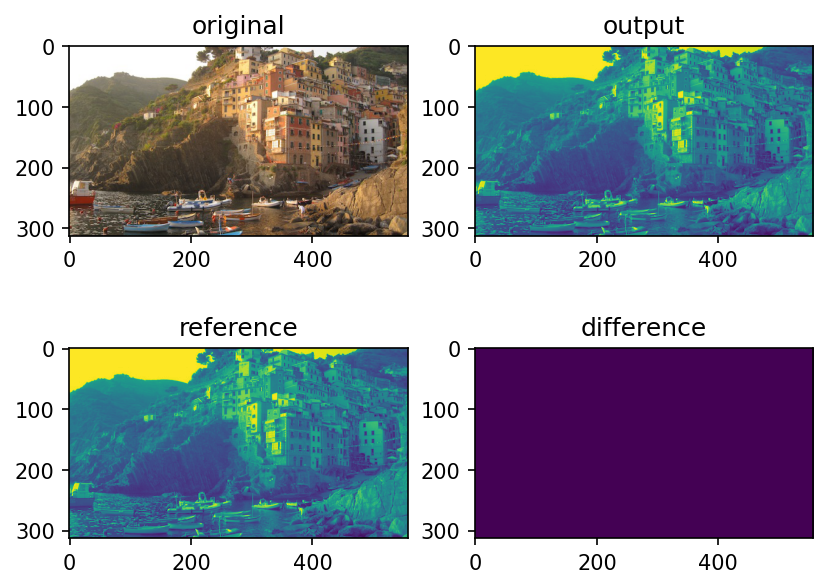

In [ ]:
# plot output images
import matplotlib.pyplot as plt
_,ax = plt.subplots(2,2, dpi=150)

ax[0][0].imshow(plt.imread("../src/HW1/cinque_terre_small.jpg"))
ax[0][0].set_title("original")
ax[0][0].grid(False)

ax[0][1].imshow(plt.imread("HW1_output.png"))
ax[0][1].set_title("output")
ax[0][1].grid(False)

ax[1][0].imshow(plt.imread("HW1_reference.png"))
ax[1][0].set_title("reference")
ax[1][0].grid(False)

ax[1][1].imshow(plt.imread("HW1_differenceImage.png"))
ax[1][1].set_title("difference")
ax[1][1].grid(False)

plt.show()

Notas:
* Del archivo /content/udacity-cs344-colab/src/CMakeLists.txt, se cambió la linea 24 por: -Wno-deprecated-gpu-targets
* Del archivo /content/udacity-cs344-colab/build/HW1/CMakeFiles/HW1.dir/HW1_generated_student_func.cu.o.cmake, se cambió la linea 76 por: -Wno-deprecated-gpu-targets
* Del archivo /content/udacity-cs344-colab/build/HW1/CMakeFiles/HW1.dir/HW1_generated_student_func.cu.o.cmake.pre-gen, se cambió la linea 76 por: -Wno-deprecated-gpu-targets
* Del archivo /content/udacity-cs344-colab/src/HW1/HW1.cpp, se cambió de la linea 30 CV_LOAD_IMAGE_COLOR por cv::IMREAD_COLOR
* Del archivo /content/udacity-cs344-colab/src/HW1/HW1.cpp, se cambió de la linea 36 CV_BGR2RGBA por cv::COLOR_BGR2RGBA
* Del archivo /content/udacity-cs344-colab/src/HW1/HW1.cpp, se cambió de la linea 80 CV_LOAD_IMAGE_GRAYSCALE por cv::IMREAD_GRAYSCALE